# Some basic exercises to get your hands warm

## Single Qubit

The single qubit is the fundamental unit of information in Quantum Computing. It is realized as an actual physical system in the hardware, but when it comes to Quantum Computing, it is instead treated as a mathematical object for use in computation!

We declare a single qubit below:

In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
dev = qml.device("lightning.qubit", wires=1)

In [3]:
@qml.qnode(dev)
def circuit():
    qml.Identity(0)
    return qml.state()

(<Figure size 400x200 with 1 Axes>, <Axes: >)

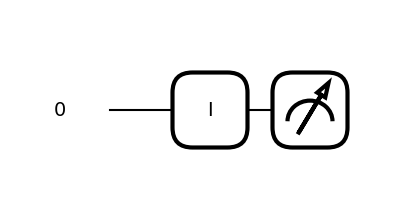

In [4]:
qml.draw_mpl(circuit)()

In [5]:
circuit()

tensor([1.+0.j, 0.+0.j], requires_grad=True)

## Dynamics for the Single Qubit

What are some things we can do with a single qubit?

Look at the Braket guide for options:
https://docs.aws.amazon.com/braket/latest/developerguide/braket-constructing-circuit.html

1. Create a uniform super-position of states between 0 and 1:

In [6]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(0)
    return qml.expval(qml.PauliZ(0))

(<Figure size 400x200 with 1 Axes>, <Axes: >)

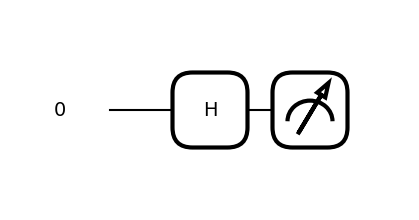

In [7]:
qml.draw_mpl(circuit)()

In [8]:
circuit()

tensor(0., requires_grad=True)

2. Now I don't want an even superposition, but instead I want it to be 1 approximately 25% of the time. How do I create that?

Hint: Use rotation gates

In [9]:
@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/3, wires = 0)
    return qml.probs()

In [10]:
circuit()

array([0.75, 0.25])

3. Is that the only way I can create that? Find another way to achieve the same result.

In [11]:
@qml.qnode(dev)
def circuit():
    qml.RY(np.pi/3, wires = 0)
    return qml.probs()

In [12]:
circuit()

array([0.75, 0.25])

4. Write the code to get any probability you want for 0 and 1.

Hint: Look at the matrix for rotation gates

In [13]:
prob_wanted_0 = 0.15

In [14]:
rx_angle = np.arccos(np.sqrt(prob_wanted_0)) * 2

In [15]:
@qml.qnode(dev)
def circuit():
    qml.RX(rx_angle, wires = 0)
    return qml.probs()

In [16]:
circuit()

array([0.15, 0.85])

## Multiple Qubits

As with classical bits, the true magic happens when we create multiple qubits and compose them together!

In [17]:
dev = qml.device("lightning.qubit", wires=3)

In [18]:
@qml.qnode(dev)
def circuit():
    qml.Identity(0)
    qml.Identity(1)
    qml.Identity(2)
    return qml.state()

(<Figure size 400x400 with 1 Axes>, <Axes: >)

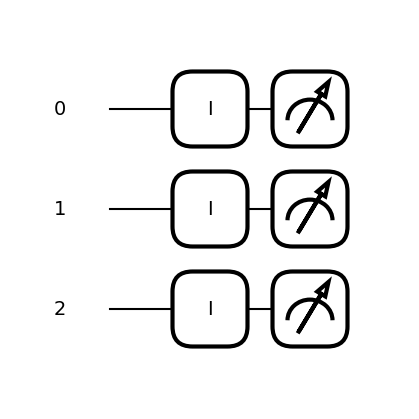

In [19]:
qml.draw_mpl(circuit)()

In [20]:
circuit()

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

## Dynamics with Multiple Qubits

What are some things we can do with multiple qubits? It is important to remember that dynamics with single qubits is just as important when thinking about multiple qubits.

1a. First get 10 state, then turn it in 11 state using a 2 qubit gate.

In [21]:
dev = qml.device("lightning.qubit", wires=2)

In [22]:
@qml.qnode(dev)
def circuit():
    qml.X(0)
    qml.CNOT([0,1])
    return qml.state()

In [23]:
circuit()

tensor([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], requires_grad=True)

1b. Is that the only way to get it? What would be the simplest way of getting such a state?

In [24]:
@qml.qnode(dev)
def circuit():
    qml.X(0)
    qml.X(1)
    return qml.state()

In [25]:
circuit()

tensor([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], requires_grad=True)

2a. One of the most interesting states is the Bell state, which is an equal superposition between 00 and 11 state, as seen below:

$$\frac{|00 \rangle + |11 \rangle}{\sqrt{2}}$$

Create it below:

In [26]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(0)
    qml.CNOT([0,1])
    return qml.state()

In [27]:
circuit()

tensor([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j], requires_grad=True)

2b. Create the other Bell state, seen below:

$$\frac{|00 \rangle - |11 \rangle}{\sqrt{2}}$$

Create it below:

In [28]:
@qml.qnode(dev)
def circuit():
    qml.X(0)
    qml.Hadamard(0)
    qml.CNOT([0,1])
    return qml.state()

In [29]:
circuit()

tensor([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
        -0.70710678+0.j], requires_grad=True)

3a. We know that we can apply any unitary matrix to the circuit. Try making a unitary for the CNOT gate and applying it. Repeat the exercise from 1a using it.

In [30]:
# apply a general unitary
cnot_unitary = np.array([[1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])


In [31]:
@qml.qnode(dev)
def circuit():
    qml.X(0)
    qml.QubitUnitary(cnot_unitary, wires = [0,1])
    return qml.state()

In [32]:
circuit()

array([-1.82501208e-08-1.82501208e-08j, -4.32977962e-17+4.32977863e-17j,
       -2.35513869e-16+4.99600360e-16j,  1.00000000e+00+7.21644966e-16j])

3b. Now create the unitary matrices for the 2 Bell states above:

In [33]:
bell_unitary_2a = (1/np.sqrt(2)) * np.array([[1, 0, 1, 0],
                                              [0, 1, 0, 1],
                                              [0, 1, 0, -1],
                                              [1, 0, -1, 0]])

bell_unitary_2a

tensor([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
        [ 0.        ,  0.70710678,  0.        ,  0.70710678],
        [ 0.        ,  0.70710678,  0.        , -0.70710678],
        [ 0.70710678,  0.        , -0.70710678,  0.        ]], requires_grad=True)

In [34]:
@qml.qnode(dev)
def circuit():
    qml.QubitUnitary(bell_unitary_2a, wires = [0,1])
    return qml.state()

In [35]:
circuit()

array([7.07106781e-01+4.81831422e-16j, 4.32978147e-17-1.82501208e-08j,
       4.32978013e-17-1.82501208e-08j, 7.07106781e-01+1.77689393e-17j])

In [36]:
bell_unitary_2b = (1/np.sqrt(2)) * np.array([[1, 0, 1, 0],
                                              [0, 1, 0, 1],
                                              [0, -1, 0, 1],
                                              [-1, 0, 1, 0]])


In [37]:
@qml.qnode(dev)
def circuit():
    qml.QubitUnitary(bell_unitary_2b, wires = [0,1])
    return qml.state()

In [38]:
circuit()

array([ 7.07106781e-01+4.44089210e-16j, -4.78884530e-17-1.35917284e-16j,
       -1.26393076e-16+1.35917284e-16j, -7.07106781e-01+2.49800181e-16j])

3c. Using the unitaries of the 2 Bell States above, create the last two Bell States:
    
$$\frac{|01 \rangle +|10 \rangle}{\sqrt{2}}, \frac{|01 \rangle - |10 \rangle}{\sqrt{2}}$$

In [39]:
@qml.qnode(dev)
def circuit():
    qml.X(1)
    qml.QubitUnitary(bell_unitary_2a, wires = [0,1])
    return qml.state()

In [40]:
circuit()

array([-4.32977897e-17-1.82501208e-08j,  7.07106781e-01+4.81831422e-16j,
        7.07106781e-01-3.70809119e-16j, -4.32978114e-17-1.82501208e-08j])

In [41]:
@qml.qnode(dev)
def circuit():
    qml.X(1)
    qml.QubitUnitary(bell_unitary_2b, wires = [0,1])
    return qml.state()

In [42]:
circuit()

array([ 8.94946372e-17-1.35917284e-16j,  7.07106781e-01+1.66533454e-16j,
       -7.07106781e-01+4.16333634e-16j,  1.87625416e-16+1.91428435e-16j])